# ***`Tổng quan về thuật toán Louvain`***

- Thuật toán Louvain là một thuật toán để phát hiện cộng đồng trong đồ thị.
- Được sử dụng rộng rãi do khả năng xử lý đồ thị lớn với thời gian tính toán nhanh.
- Thuật toán này tập trung vào việc tối ưu hóa Modularity, một chỉ số đo lường chất lượng của phân cụm cộng đồng trong đồ thị.
- Nguyên tắc hoạt động:
  - Thuật toán Louvain hoạt động dựa trên hai bước lặp đi lặp lại nhằm cải thiện Modularity:
  - **Bước 1: Gán các đỉnh vào các cộng đồng nhỏ:**
    - Mỗi đỉnh ban đầu được coi như một cộng đồng riêng lẻ.
    - Tiến hành kiểm tra xem việc chuyển một đỉnh từ cộng đồng hiện tại sang một cộng đồng lân cận có làm tăng Modularity không.
    - Nếu việc chuyển này làm tăng Modularity, đỉnh sẽ được di chuyển sang cộng đồng đó.
  - **Bước 2: Xây dựng đồ thị siêu cấp (Supergraph):**
    - Sau khi cộng đồng được xác định, mỗi cộng đồng được gộp lại thành một đỉnh siêu cấp trong một đồ thị mới.
    - Các cạnh giữa các cộng đồng trong đồ thị gốc trở thành trọng số của cạnh giữa các đỉnh trong đồ thị siêu cấp.
    - Quá trình lại tiếp tục từ bước 1 trên đồ thị siêu cấp này.
  - **Bước 3: Thuật toán tiếp tục lặp lại hai bước trên cho đến khi Modularity không thể tăng thêm, tức là đạt đến điểm hội tụ.**
- **Mục tiêu chính:** Tối đa hóa Modularity (đo lường mức độ mà các cộng đồng được xác định trong đồ thị có kết nối nội bộ dày đặc và kết nối bên ngoài lỏng lẻo).
- **Độ phức tạp:** Thuật toán có độ phức tạp thời gian gần tuyến tính, giúp nó xử lý tốt các đồ thị rất lớn.
- **Tự động xác định số cộng đồng:** Không cần cung cấp trước số lượng cộng đồng như nhiều thuật toán khác.

- **Ưu điểm và hạn chế:**
  - **Ưu điểm:**
    - **Hiệu quả cao:** Xử lý tốt với đồ thị lớn nhờ cấu trúc lặp lại đơn giản.
    - **Linh hoạt:** Ứng dụng được cho cả đồ thị không trọng số và đồ thị trọng số.
    - **Chất lượng giải pháp tốt:** Thường tạo ra các cộng đồng có độ chính xác cao và Modularity lớn.

  - **Hạn chế:**
    - **Nhạy cảm với các thông số ban đầu:** Kết quả có thể bị ảnh hưởng bởi cách khởi tạo.
    - **Hiệu ứng độ phân giải (Resolution Limit):** Có thể bỏ qua các cộng đồng nhỏ trong các đồ thị lớn.


# ***`Tóm tắt tổng quan các chỉ số đánh giá việc phát hiện cộng đồng (công thức, phạm vi, như thế nào là tốt, .... )`***

**Modularity:** \\

$Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)$

- $A_{ij}$: Trọng số cạnh giữa nút $i$ và $j$.
- $k_{i}, k_{j}$: Bậc của các nút $i$ và $j$.
- $m$: Tổng trọng số của các cạnh trong đồ thị.
- $\delta(c_i, c_j)$: Bằng 1 nếu $i$, $j$ thuộc cùng cộng đồng, ngược lại bằng 0. \\
- Phạm vi: $[-1, 1]$ \\
    - Càng gần 1, các cộng đồng được phân chia rõ ràng, với các cạnh tập trung bên trong cộng đồng và ít kết nối ra bên ngoài.
    - Càng gần -1, Phân chia không tốt hoặc không có cấu trúc cộng đồng rõ ràng.
\\

**Conductance:** \\
$\phi(S) = \frac{\text{cut}(S, \overline{S})}{\min(\text{vol}(S), \text{vol}(\overline{S}))}$
- ${\text{cut}(S, \overline{S})}$: Tổng trọng số các cạnh giữa cộng đồng $S$ và $\overline{S}$.
- $\text{vol}(S)$: Tổng trọng số các cạnh nối với các nút trong $S$.
- Phạm vi: $[0, 1]$ \\
    - Càng gần 0, các cộng đồng có kết nối nội bộ chặt chẽ và ít cạnh ra bên ngoài.
    - Càng gần 1, cộng đồng bị phân chia kém hoặc không rõ ràng.
    
\\
**Normalized Cut:** \\
$\text{NCut}(S, \overline{S}) = \frac{\text{cut}(S, \overline{S})}{\text{vol}(S)} + \frac{\text{cut}(S, \overline{S})}{\text{vol}(\overline{S})}$
- Phạm vi: Càng nhỏ càng tốt.



# ***`Thực hiện phân tích việc (nhận xét) phát hiện cộng đồng cho mạng xã hội tự chọn`***

In [1]:
!pip install python-louvain


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import networkx as nx

# Đọc file danh sách cạnh
G = nx.read_edgelist("D:/du lieu o cu/HUTECH Courses/Social Networking Course/DataLab/congress_network/congress_network/congress - Copy.edgelist", create_using=nx.DiGraph(), nodetype=int)

print(f"Số nút: {G.number_of_nodes()}")
print(f"Số cạnh: {G.number_of_edges()}")


Số nút: 384
Số cạnh: 1654


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import community
from community import community_louvain  # Louvain method
from collections import defaultdict

# Define CommunityDetection class
class CommunityDetection:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}
        self.metrics = pd.DataFrame()
        self.centrality_metrics = pd.DataFrame()

    def detect_girvan_newman(self):
        generator = community.girvan_newman(self.graph)
        best_partition = max(generator, key=lambda partition: community.modularity(self.graph, partition))
        self.partitions['Girvan-Newman'] = list(best_partition)
        return self.partitions['Girvan-Newman']

    def detect_label_propagation(self):
        partition = list(community.label_propagation_communities(self.graph))
        self.partitions['Label Propagation'] = partition
        return self.partitions['Label Propagation']

    def detect_louvain(self):
        partition_dict = community_louvain.best_partition(self.graph)  # Returns a dictionary
        communities = defaultdict(list)

        # Group nodes by community index
        for node, group in partition_dict.items():
            communities[group].append(node)
        
        self.partitions['Louvain'] = list(communities.values())
        return self.partitions['Louvain']

    def calculate_metrics(self):
        metrics_data = []
        for name, communities in self.partitions.items():
            metrics_data.append({
                'Algorithm': name,
                'Num Communities': len(communities),
                'Modularity': community.modularity(self.graph, communities)
            })
        self.metrics = pd.DataFrame(metrics_data)
        return self.metrics

    def create_community_node_colors(self, communities):
        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break
        return node_colors

    def visualize_communities(self):
        fig, axes = plt.subplots(1, len(self.partitions), figsize=(20, 6))
        for ax, (name, communities) in zip(axes, self.partitions.items()):
            node_colors = self.create_community_node_colors(communities)
            pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=2)
            modularity_score = community.modularity(self.graph, communities)
            ax.set_title(f"{name}\n{len(communities)} communities (Modularity: {modularity_score:.3f})")
            nx.draw(self.graph, pos=pos, node_size=500, node_color=node_colors,
                    with_labels=True, font_size=10, ax=ax)
        plt.tight_layout()
        plt.show()

    def plot_metrics(self):
        if self.metrics.empty:
            print("Metrics have not been calculated yet.")
            return

        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        # Bar chart for comparing 'Num Communities'
        axes[0].bar(self.metrics['Algorithm'], self.metrics['Num Communities'], color="#8E44AD")
        axes[0].set_title("Num Communities Comparison")
        axes[0].set_xlabel("Algorithm")
        axes[0].set_ylabel("Num Communities")

        # Bar chart for comparing Modularity
        axes[1].bar(self.metrics['Algorithm'], self.metrics['Modularity'], color="#F2D140")
        axes[1].set_title("Modularity Comparison")
        axes[1].set_xlabel("Algorithm")
        axes[1].set_ylabel("Modularity")

        plt.tight_layout()
        plt.show()

    def calculate_centrality_metrics(self):
        degree_centrality = nx.degree_centrality(self.graph)
        betweenness_centrality = nx.betweenness_centrality(self.graph)
        closeness_centrality = nx.closeness_centrality(self.graph)

        centrality_data = {
            'Node': list(self.graph.nodes()),
            'Degree Centrality': [degree_centrality[node] for node in self.graph.nodes()],
            'Betweenness Centrality': [betweenness_centrality[node] for node in self.graph.nodes()],
            'Closeness Centrality': [closeness_centrality[node] for node in self.graph.nodes()],
        }

        self.centrality_metrics = pd.DataFrame(centrality_data)
        return self.centrality_metrics  


Community Metrics:
           Algorithm  Num Communities  Modularity
0      Girvan-Newman              190    0.228817
1  Label Propagation                1    0.000000
2            Louvain                9    0.513882


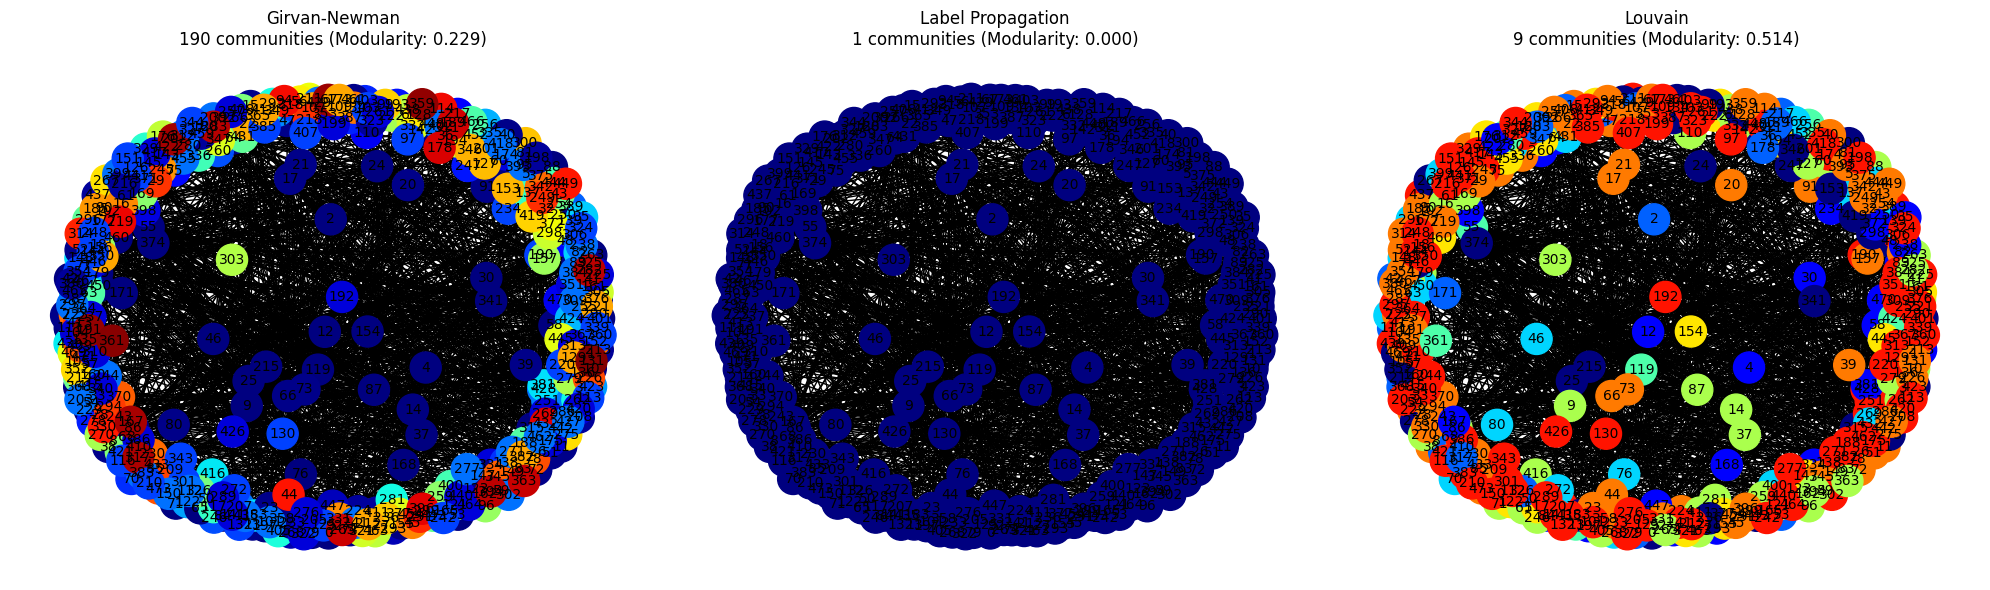

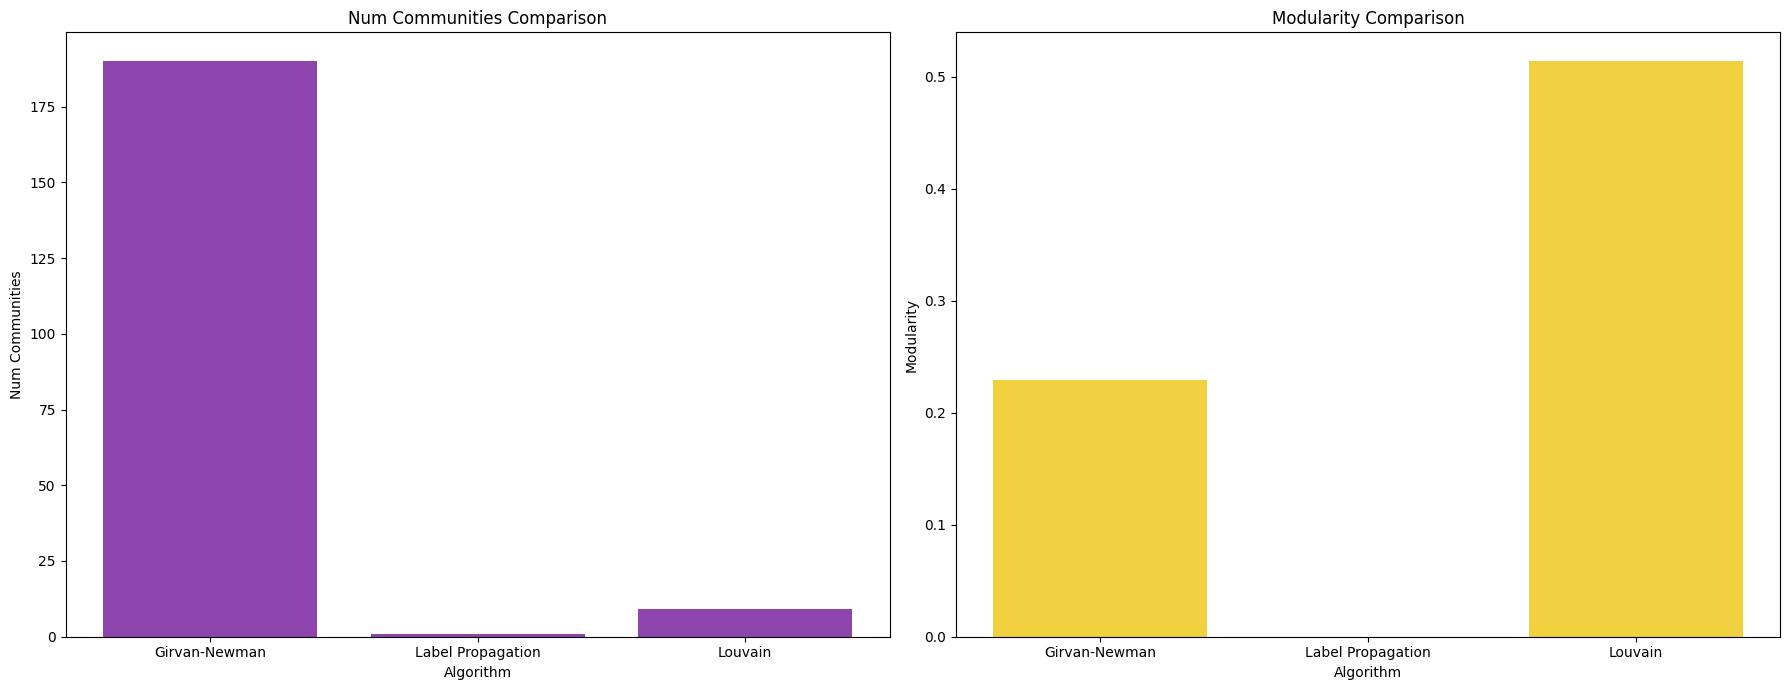

Centrality Metrics:
     Node  Degree Centrality  Betweenness Centrality  Closeness Centrality
0       0           0.057441                0.007202              0.433258
1       4           0.101828                0.027768              0.452719
2      12           0.086162                0.032402              0.435227
3      18           0.067885                0.012308              0.420417
4      25           0.127937                0.045920              0.458683
..    ...                ...                     ...                   ...
379   412           0.002611                0.000000              0.289713
380   151           0.002611                0.000000              0.280381
381   210           0.002611                0.000000              0.280381
382   339           0.002611                0.000000              0.280381
383   344           0.002611                0.000000              0.280381

[384 rows x 4 columns]


In [4]:

# Load the edgelist file
file_path = "D:/du lieu o cu/HUTECH Courses/Social Networking Course/DataLab/congress_network/congress_network/congress - Copy.edgelist"  # Replace with your file path
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Initialize and run CommunityDetection
cd = CommunityDetection(G)

# Detect communities
girvan_newman_communities = cd.detect_girvan_newman()
label_propagation_communities = cd.detect_label_propagation()
louvain_communities = cd.detect_louvain()

# Calculate metrics
community_metrics = cd.calculate_metrics()

# Display results
print("Community Metrics:")
print(community_metrics)

# Visualize communities and metrics
cd.visualize_communities()
cd.plot_metrics()

# Calculate and display centrality metrics
centrality_metrics = cd.calculate_centrality_metrics()
print("Centrality Metrics:")
print(centrality_metrics)

In [5]:
cd.calculate_centrality_metrics()

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,0,0.057441,0.007202,0.433258
1,4,0.101828,0.027768,0.452719
2,12,0.086162,0.032402,0.435227
3,18,0.067885,0.012308,0.420417
4,25,0.127937,0.045920,0.458683
...,...,...,...,...
379,412,0.002611,0.000000,0.289713
380,151,0.002611,0.000000,0.280381
381,210,0.002611,0.000000,0.280381
382,339,0.002611,0.000000,0.280381
